<a href="https://colab.research.google.com/github/IvanIndargo/Datamining_exersice/blob/main/IvanIndargo_0706022210064_Week6_Adult_Income_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mengimport library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [ ]:
url = 'https://raw.githubusercontent.com/IvanIndargo/dataset-DM/refs/heads/main/adult.csv'
df = pd.read_csv(url) #mengimport dataset

df.sample(10) #menampilkan sepuluh data random dari dataset untuk pengecekan data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
35284,17,Private,198830,11th,7,Never-married,Adm-clerical,Other-relative,White,Female,0,0,10,United-States,<=50K
47064,36,Private,126569,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,Ecuador,>50K
21352,68,Self-emp-not-inc,450580,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,20,United-States,<=50K
12954,47,Private,301431,Some-college,10,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,40,United-States,<=50K
8733,33,Private,93034,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,Laos,<=50K
10588,46,Private,202606,HS-grad,9,Separated,Other-service,Not-in-family,Black,Female,0,0,30,Haiti,<=50K
36416,38,Private,217349,Assoc-voc,11,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States,>50K
37457,64,?,104756,Some-college,10,Widowed,?,Unmarried,White,Female,0,0,8,United-States,<=50K
40581,41,State-gov,283917,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,35,United-States,>50K
34996,28,Private,105817,11th,7,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K


In [ ]:
df.info() #menampilkan info dari kolom dataset untuk menunjukkan jumlah data, jumlah kolom, nama kolom, mengecek kekosongan data, dan tipe data untuk memudahkan analisa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe() # menunjukkan deskripi kolom dari masing masing dataset, seperti rata-rata, nilai minimum, nilai maksimum, nilai tengah, dan lainnya untuk membantu dalam analisa

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


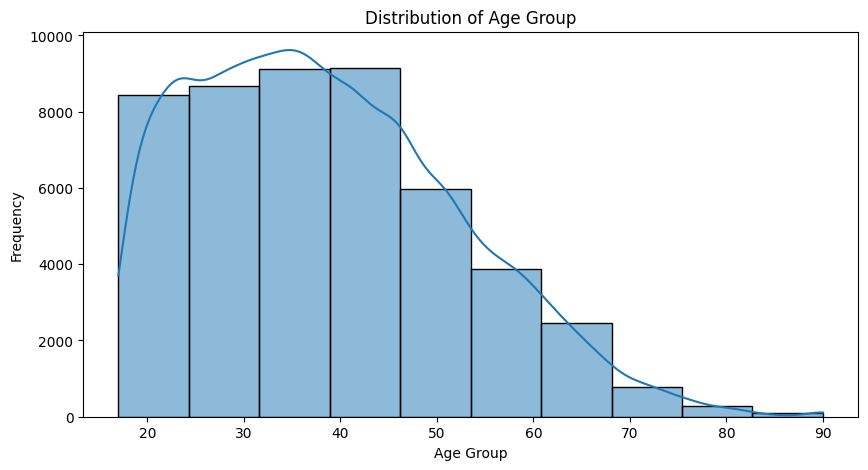

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Distribution of Age Group')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()
#memvisualisasikan distribusi kelompok usia dari kolom age dalam DataFrame. Histogram ini memiliki 10 bin dan dilengkapi dengan overlay Estimasi Kerapatan Inti (KDE) untuk menunjukkan kepadatan data

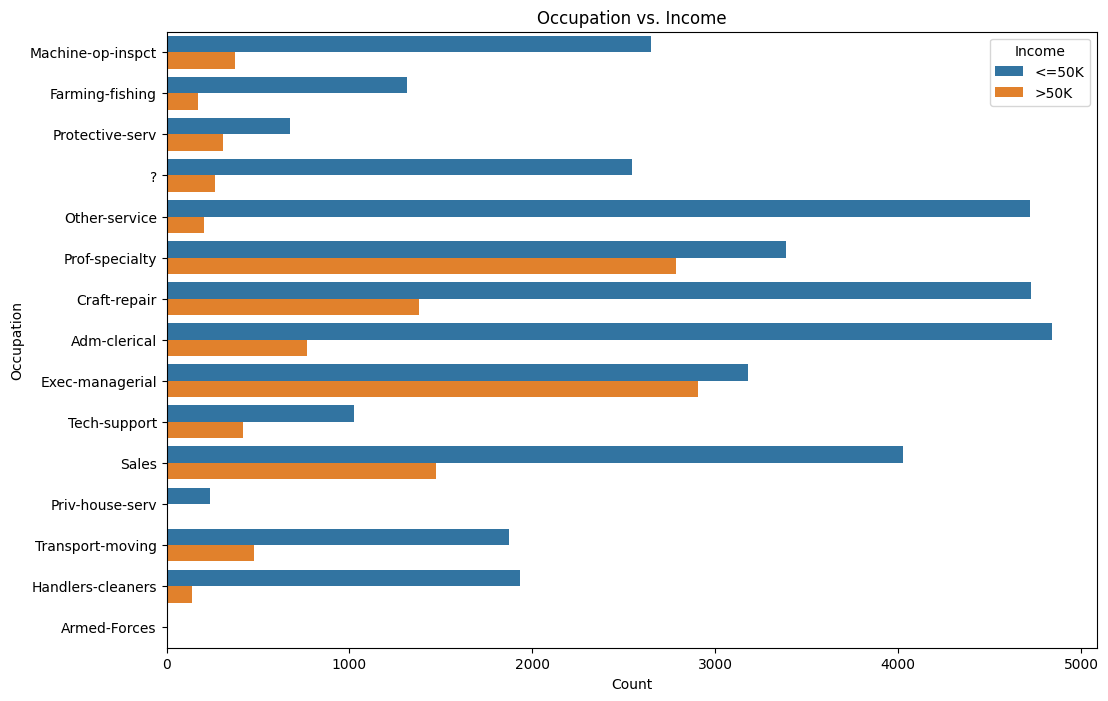

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='occupation', hue='income')
plt.title('Occupation vs. Income')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.legend(title="Income")
plt.show()
#memvisualisasikan hubungan antara jenis pekerjaan (occupation) dan tingkat pendapatan (income) dalam DataFrame
#membedakan jumlah berdasarkan tingkat pendapatan, yang memungkinkan analisis yang lebih mendalam tentang distribusi pendapatan dalam setiap kategori pekerjaan

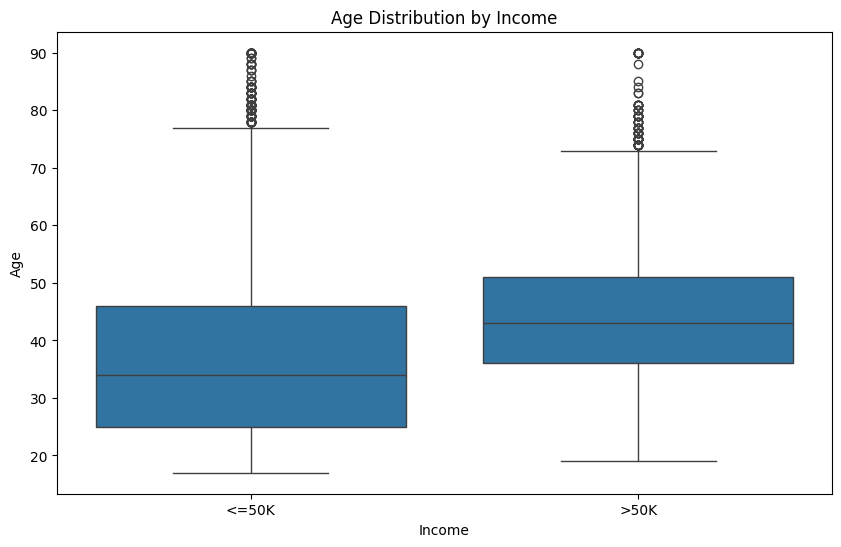

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='income', y='age')
plt.title('Age Distribution by Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()
#memvisualisasikan distribusi usia (age) berdasarkan kategori pendapatan (income) dalam DataFrame
#memberikan informasi tentang median, kuartil, dan pencilan dari data usia untuk setiap kategori pendapatan. Judul plot "Age Distribution by Income" dan label sumbu yang relevan memperjelas informasi yang disampaikan, memungkinkan analisis yang lebih mendalam mengenai bagaimana usia terdistribusi dalam berbagai tingkat pendapatan.

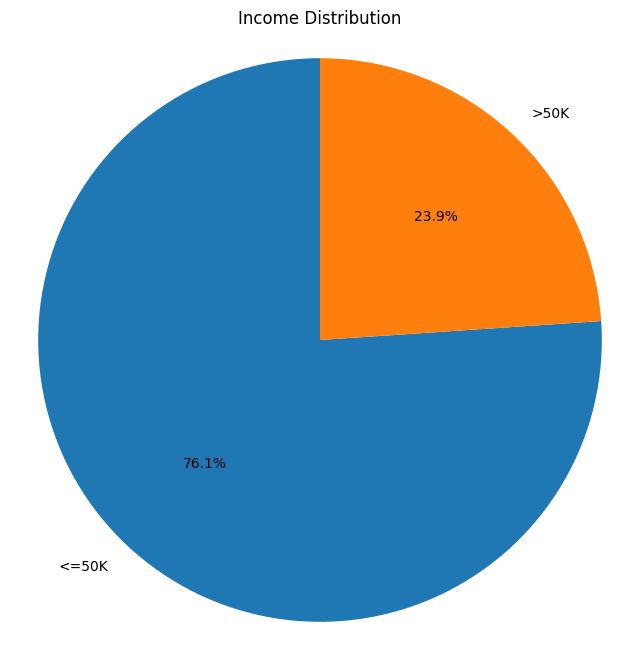

In [ ]:
income_counts = df['income'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Income Distribution')
plt.axis('equal')
plt.show()
#memvisualisasikan distribusi kategori pendapatan (income) dalam DataFrame.

In [ ]:

# untuk mengubah kolom kategorikal (workclass, education, dll) menjadi numerik
label_encoder = LabelEncoder()

# untuk identifikasi dan memilih semua kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns

# untuk mengonversi setiap kolom kategorikal ke numerik
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# untuk menampilkan 10 data random
df.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48318,45,6,31478,9,13,2,12,0,4,1,2829,0,60,39,0
18390,66,4,146454,15,10,2,12,0,4,1,5556,0,40,39,1
19664,40,4,327573,8,11,2,3,0,4,1,0,0,40,39,0
8135,28,4,109494,15,10,2,1,0,4,1,0,1485,40,39,0
10004,46,4,118889,11,9,2,12,0,4,1,0,0,68,39,1
44663,20,0,195767,11,9,4,0,3,4,1,0,0,40,39,0
4108,50,0,199301,8,11,4,0,4,2,0,0,0,16,39,0
15168,17,4,208046,11,9,4,12,3,2,0,0,0,16,39,0
892,70,4,573446,11,9,2,3,0,4,1,1455,0,40,39,0
15193,36,4,166289,11,9,4,1,3,2,0,0,0,40,39,0


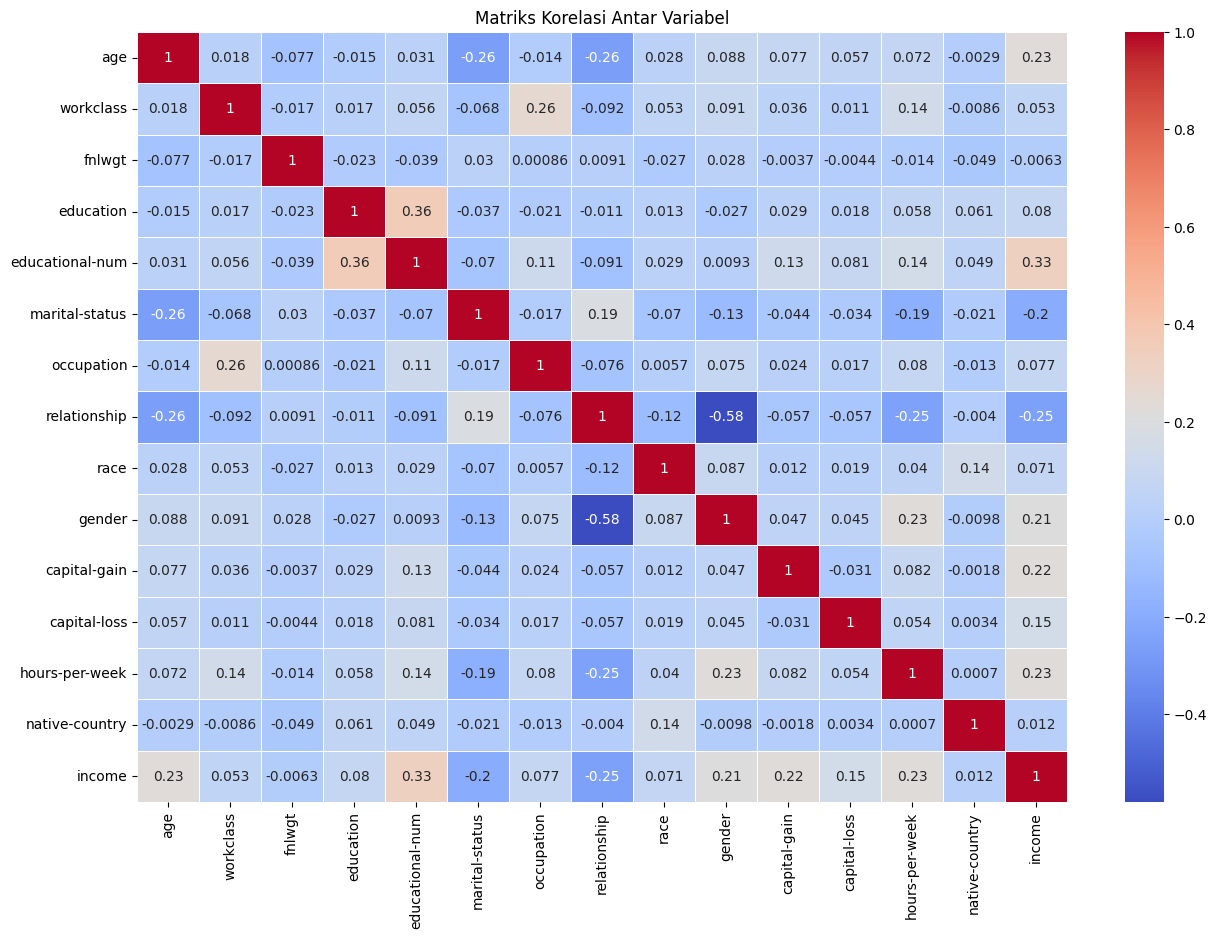

In [ ]:
# Menghitung korelasi
corr_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Menambahkan judul
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

#Pendidikan-num (0.33) adalah variabel dengan korelasi tertinggi terhadap pendapatan, menunjukkan bahwa tingkat pendidikan memiliki pengaruh positif yang signifikan terhadap pendapatan.
#Usia (0.24), jam per minggu (0.23), keuntungan modal (0.22), dan gender (0.22) juga memiliki korelasi positif yang cukup tinggi terhadap pendapatan, meskipun tidak sekuat pendidikan-num.
#Variabel seperti hubungan (-0,25) dan status pernikahan (-0.19) juga memiliki korelasi negatif terhadap pendapatan.

In [ ]:
X = df.drop(['income'], axis=1)
y = df['income']
#membuat variabel untuk menyimpan kolom independet dan kolom dependent untuk memudahkan dalam analisa
#variabel y digunakan untuk menyimpan value dari outcome, sedangkan variabel x digunakan untuk menyimpan value kolom selain outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#untuk memisahkan data menjadi dua bagian, sebagian data dijadikan data training dan sebagian lainnya digunakan untuk data test
#besar pembagian data nya dapat dirubah dan dibuat dengan mengganti test size
#di sini besar data test 20 persen dan data training sebanyak 80 persen

In [ ]:
X_train.shape, X_test.shape
#untuk menunjukkan jumlah kolom dan baris

((39073, 14), (9769, 14))

In [ ]:
dt_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

dt_en.fit(X_train, y_train)
#pembuatan dan pelatihan pemodelan desicion tree dengan menggunakan kriteria entropi

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = dt_en.predict(X_test)
#membuat variabel untuk pemrediksian data x_test

In [ ]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))
#menampilkan tingkat atau score keakurasian

Model accuracy score with criterion entropy: 0.8449


In [ ]:
y_train_pred = dt_en.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = dt_en.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")
else:
    print("The model might be underfitting.")
# membuat pelatihan model dan prediksi serta melihat keakurasian pemodelan apakan model ini overfitting, underfitting, atau model tersebut sudah balance

Training accuracy: 0.8384
Test accuracy: 0.8449
The model might be underfitting.


[Text(0.5, 0.875, 'x[7] <= 0.5\nentropy = 0.796\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\nentropy = 0.992\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\nentropy = 0.918\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'entropy = 0.882\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'entropy = 0.124\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\nentropy = 0.854\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'entropy = 0.914\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'entropy = 0.027\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\nentropy = 0.463\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\nentropy = 0.398\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'entropy = 0.287\nsamples = 20994\nvalue = [1994

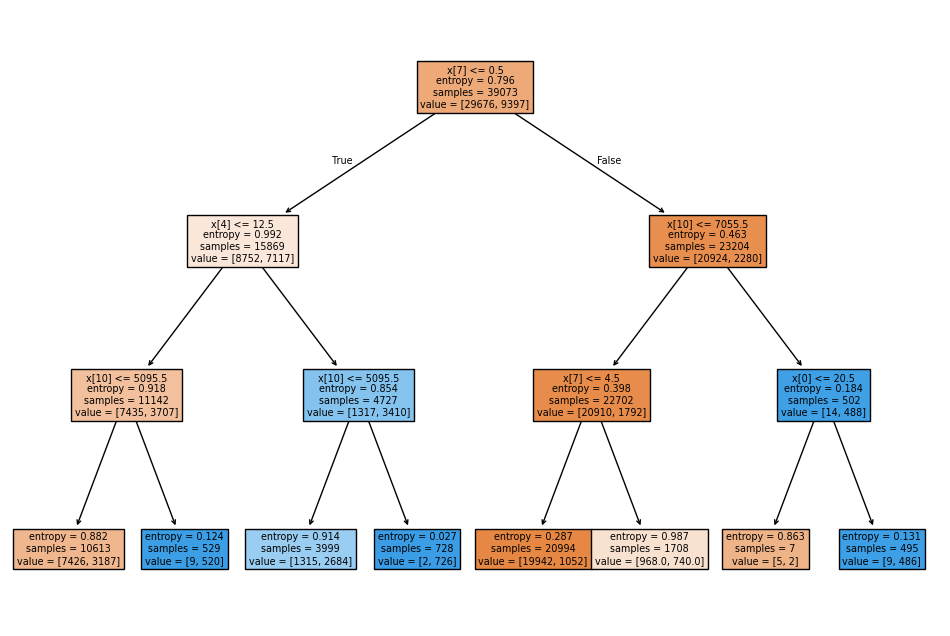

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_en.fit(X_train, y_train), filled=True)
#memvisualisasikan decision tree dengan kriteria entropi

In [ ]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

dt_gini.fit(X_train, y_train)
#pembuatan dan pelatihan pemodelan desicion tree dengan menggunakan kriteria gini

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = dt_gini.predict(X_test)
#membuat variabel untuk pemrediksian data x_test

In [ ]:
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))
#menampilkan tingkat atau score keakurasian

Model accuracy score with criterion gini: 0.8449


In [ ]:
y_train_pred = dt_gini.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = dt_gini.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")
else:
    print("The model might be underfitting.")
# membuat pelatihan model dan prediksi serta melihat keakurasian pemodelan apakan model ini overfitting, underfitting, atau model tersebut sudah balance

Training accuracy: 0.8384
Test accuracy: 0.8449
The model might be underfitting.


[Text(0.5, 0.875, 'x[7] <= 0.5\ngini = 0.365\nsamples = 39073\nvalue = [29676, 9397]'),
 Text(0.25, 0.625, 'x[4] <= 12.5\ngini = 0.495\nsamples = 15869\nvalue = [8752, 7117]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 5095.5\ngini = 0.444\nsamples = 11142\nvalue = [7435, 3707]'),
 Text(0.0625, 0.125, 'gini = 0.42\nsamples = 10613\nvalue = [7426, 3187]'),
 Text(0.1875, 0.125, 'gini = 0.033\nsamples = 529\nvalue = [9, 520]'),
 Text(0.375, 0.375, 'x[10] <= 5095.5\ngini = 0.402\nsamples = 4727\nvalue = [1317, 3410]'),
 Text(0.3125, 0.125, 'gini = 0.441\nsamples = 3999\nvalue = [1315, 2684]'),
 Text(0.4375, 0.125, 'gini = 0.005\nsamples = 728\nvalue = [2, 726]'),
 Text(0.75, 0.625, 'x[10] <= 7055.5\ngini = 0.177\nsamples = 23204\nvalue = [20924, 2280]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 4.5\ngini = 0.145\nsamples = 22702\nvalue = [20910, 1792]'),
 Text(0.5625, 0.125, 'gini = 0.095\nsamples = 20994\nvalue = [19942, 1052]'),
 Text(0.6875, 0.125, '

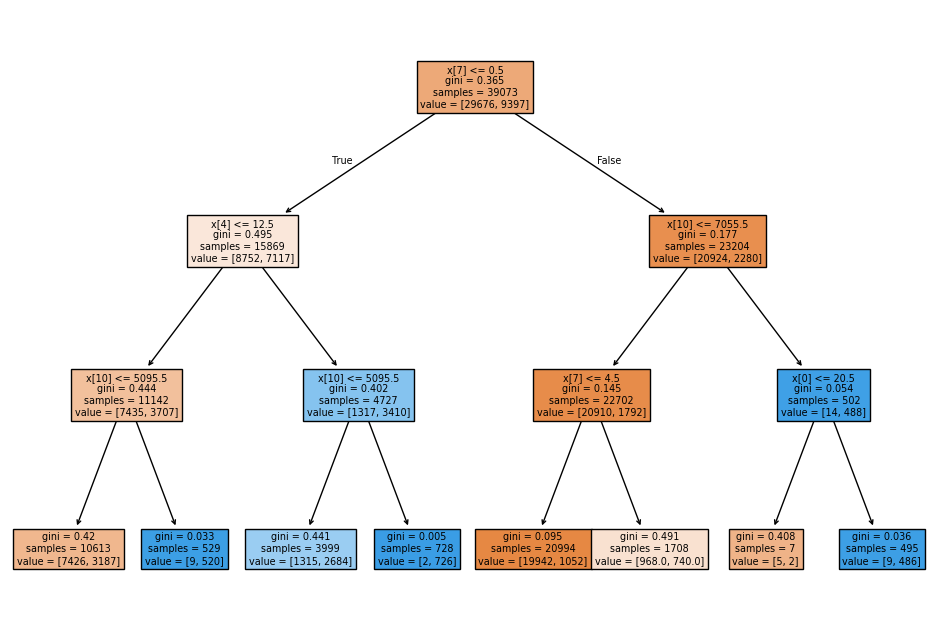

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_gini.fit(X_train, y_train), filled=True)
#memvisualisasikan decision tree dengan kriteria gini

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print("Confusion Matrix for Entropy-based Tree:\n", cm)
cm = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix for Gini-based Tree:\n", cm)
#pembuatan confusion matrix berdasarkan decision tree entropi dan gini

Confusion Matrix for Entropy-based Tree:
 [[7136  343]
 [1172 1118]]
Confusion Matrix for Gini-based Tree:
 [[7136  343]
 [1172 1118]]


In [ ]:
print(classification_report(y_test, y_pred_en))
print(classification_report(y_test, y_pred_gini))
#untuk menampilkan laporan pengklasifikasian dari entropi dan gini
#dilihat dari hasil laporannya keduanya memiliki tingkat akurasi yang hampir sama di angka 0.96 dan 0.95 dan nilai dari recall, precision, f1-score yang hanya memiliki sedikit perbedaan
#hal ini dapat menunjukkan bahwa kedua pemodelan tersebut hampir sama akuratnya tetapi kita dapat menentukan dan mengambil pemodelan yang memiliki performa lebih baik

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7479
           1       0.77      0.49      0.60      2290

    accuracy                           0.84      9769
   macro avg       0.81      0.72      0.75      9769
weighted avg       0.84      0.84      0.83      9769



In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
#pembuatan dan pelatihan pemodelan menggunakan Gaussian Naive Bayes

GaussianNB()

In [ ]:
nb_y_pred = nb_classifier.predict(X_test)
#membuat variabel untuk pemrediksian data x_test

In [ ]:
cm = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix for Naive Bayes:\n", cm)
#pembuatan confussion matriks

Confusion Matrix for Naive Bayes:
 [[7099  380]
 [1580  710]]


In [ ]:
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred)))
# print score keakurasiannya

Accuracy Score: 0.7994


In [ ]:
print(classification_report(y_test, nb_y_pred))
#print laporan report dari akurasi, precision, recall, f1-score, dsb

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      7479
           1       0.65      0.31      0.42      2290

    accuracy                           0.80      9769
   macro avg       0.73      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)
#pembuatan dan pelatihan pemodelan dengan menggunakan logistic regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [ ]:
y_pred_log = classifier.predict(X_test)
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})
print(comparison_table.head())
#membuat pelatihan untuk memprediksi data x_test dan membuat komparasi untuk menunjukkan tabel aktual dan tabel prediksi

       y_test  y_pred
7762        0       0
23881       0       0
30507       1       1
28911       0       0
19484       0       0


In [ ]:
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log)))
# print score keakurasiannya

Accuracy Score: 0.8061


In [ ]:
cmatrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cmatrix)
#confusion matrix

Confusion Matrix:
 [[7034  445]
 [1449  841]]


In [ ]:
print(classification_report(y_test, y_pred_log))
#print laporan report dari akurasi, precision, recall, f1-score, dsb
#untuk menampilkan laporan pengklasifikasian dari entropi dan gini
#dilihat dari hasil laporannya keduanya memiliki tingkat akurasi yang hampir sama di angka 0.81 dan 0.80 dan nilai dari recall, precision, f1-score yang hanya memiliki sedikit perbedaan
#hal ini dapat menunjukkan bahwa kedua pemodelan tersebut hampir sama akuratnya tetapi kita dapat menentukan dan mengambil pemodelan yang memiliki performa lebih baik

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7479
           1       0.65      0.37      0.47      2290

    accuracy                           0.81      9769
   macro avg       0.74      0.65      0.68      9769
weighted avg       0.79      0.81      0.79      9769

